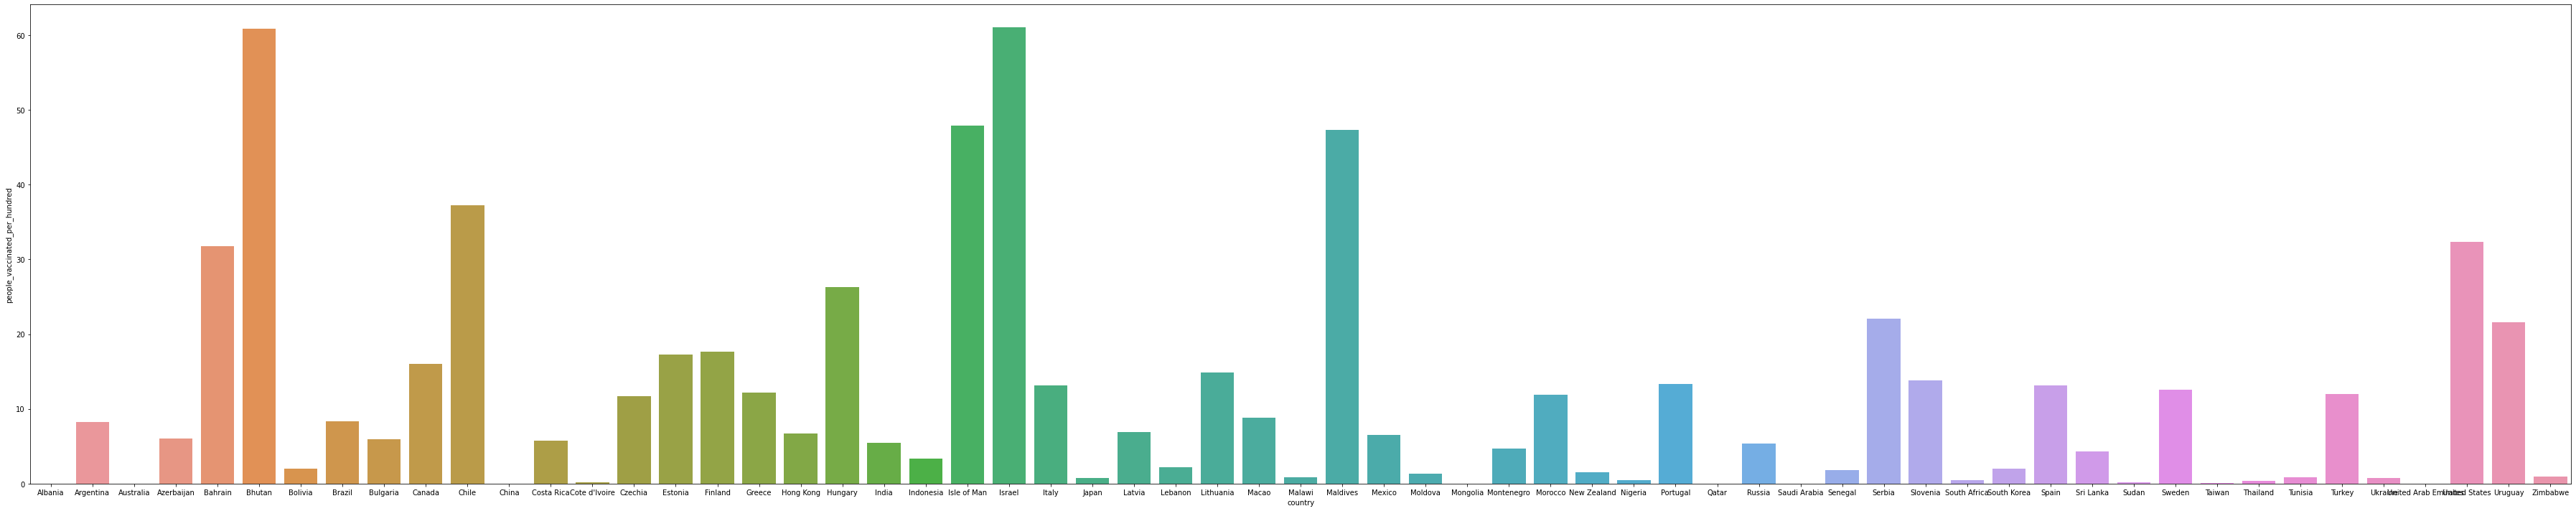

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('D:\Data Analysis TP\country_vaccinations.csv')

ind = df[df['country'] == 'India']

ind.reset_index(inplace=True)
ind.drop(['index'],inplace=True,axis=1)

# ind.columns

ind = ind[['date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines']]

df = df[df['date'] == '06-04-2021']
df.reset_index(inplace=True)
df.drop(['index'],inplace=True,axis=1)



plt.figure(figsize=(50,10))
sns.barplot(x='country',y='people_vaccinated_per_hundred',data=df)
plt.tight_layout()
plt.savefig('D:\Data Analysis TP\country v vaccPer100.png',dpi=600)

ind['dm'] = ind['date']
for i in range(len(ind['date'])):
    ind['dm'][i] = ind['date'][i].split('-')[0]+'-'+ind['date'][i].split('-')[1]

# ind

# plt.figure(figsize=(50,10))
# sns.barplot(x='dm',y='people_vaccinated_per_hundred',data=ind)
# plt.tight_layout()
# plt.grid()
# plt.yticks(ticks=np.arange(0,15,1))
# plt.savefig('D:\Data Analysis TP\India date v vaccPer100.png',dpi=600)



#df.iplot(kind='bar',x='country',y='total_vaccinations_per_hundred',xTitle='Country',yTitle='Total Vaccinations Per 100')

In [30]:
import cufflinks as cf

In [31]:
cf.go_offline()

In [32]:
df.iplot(kind='bar',x='country',y='total_vaccinations_per_hundred',xTitle='Country',yTitle='Total Vaccinations Per 100')

In [55]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(
        type = 'choropleth',
        locations = df['iso_code'],
        z = df['total_vaccinations_per_hundred'],
        text = df[['country','vaccines']],
        colorbar = {'title' : 'Total Vaccinations per Hundred'},
      ) 
layout = dict(
    title = 'Total Vaccinations per Hundred as of 06-April 2021, and Vaccines used in each country',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#import plotly.io as pio
#pio.write_html(fig, 'D:\Data Analysis TP\choropleth.html')